In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
df = pd.read_csv('skill.csv')

In [ ]:
skills_data = df['skills']

In [ ]:
print(skills_data)

0       ['\nPerformance Management\n', '\nHuman Resour...
1       ['\nTalent Acquisition\n', '\nEmployee Engagem...
2       ['\nHuman Resources\n', '\nRecruiting\n', '\nT...
3                                                      []
4       ['\nTeam Management\n', '\nHuman Resources\n',...
                              ...                        
1246                                                   []
1247                                                   []
1248    ['\nManagement\n', '\nGoal Seek\n', '\nCustome...
1249                   ['\nTally ERP\n', '\nWorkshops\n']
1250    ['\nSix Sigma\n', '\nManagement\n', '\nTeamwor...
Name: skills, Length: 1251, dtype: object


In [ ]:
def clean_text(text):
    text = re.sub(r'\\n', "", text)
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.lower()  # convert to lowercase
    print(text)
    return text


In [ ]:
skills_data = skills_data.apply(clean_text)
df['skills_data'] = skills_data
print (df['skills_data'])

performance management human resources talent management talent acquisition recruiting strategy change management deferred compensation strategic hr hr policies compensation  benefits business strategy strategic human resource planning succession planning vendor management workforce planning hris personnel management employee relations management employee engagement leadership team management conflict management people skills performance appraisal organizational structure certified career coach certified hogan assessor and coach
talent acquisition employee engagement vendor management human resources recruiting performance management hr policies resource management program management benefits negotiation crm sdlc telecommunications change management vas project planning strategic hr customer relationship management crm budgets hr transformation service delivery strategy hris mis talent management team management employee relations performance appraisal personnel management strategic pa

In [ ]:

skills_tokens = skills_data.str.split()
stop_words = ['the', 'and', 'or', 'to', 'of', 'in', 'for', 'on', 'with', 'at', 'by', 'as', 'an', 'a']


In [ ]:
skills_tokens = skills_tokens.apply(lambda x: [word for word in x if word not in stop_words])
skills_clean = skills_tokens.apply(lambda x: ' '.join(x))


In [ ]:
vectorizer = TfidfVectorizer()

# fit and transform the "skills" column of the dataset
tfidf = vectorizer.fit_transform(df['skills_data'])

# print the resulting sparse matrix
print(tfidf)



  (0, 83)	0.10170541005792527
  (0, 125)	0.15761999809563157
  (0, 744)	0.15761999809563157
  (0, 303)	0.2980585471722399
  (0, 253)	0.14293405754573177
  (0, 270)	0.26868666607244035
  (0, 1562)	0.15761999809563157
  (0, 1129)	0.12150093155778041
  (0, 99)	0.11796150093642335
  (0, 1486)	0.10497145193642059
  (0, 1163)	0.13434333303622017
  (0, 344)	0.14293405754573177
  (0, 1614)	0.06299931294923364
  (0, 901)	0.07140817081760055
  (0, 540)	0.09697759319506695
  (0, 1351)	0.07650129558529009
  (0, 530)	0.18146315398131488
  (0, 1172)	0.11356217644593221
  (0, 758)	0.11106666797680877
  (0, 1765)	0.14902927358611995
  (0, 1716)	0.09118723613518988
  (0, 1577)	0.1382062406828735
  (0, 1199)	0.1875532857343814
  (0, 1368)	0.10992112772281523
  (0, 228)	0.0601549234663263
  :	:
  (1242, 1553)	0.18523927484932348
  (1242, 962)	0.5171818388045984
  (1243, 62)	0.42973045228075607
  (1243, 955)	0.44998100245100986
  (1243, 985)	0.4894090089416048
  (1243, 1567)	0.4672043071957645
  (1243, 14

## Applying LSA using SVD Algorithm

In [ ]:
import re
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import math



In [ ]:
# Vectorize the skills using tf-idf
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['skills_data'])
print(X)

  (0, 83)	0.10170541005792527
  (0, 125)	0.15761999809563157
  (0, 744)	0.15761999809563157
  (0, 303)	0.2980585471722399
  (0, 253)	0.14293405754573177
  (0, 270)	0.26868666607244035
  (0, 1562)	0.15761999809563157
  (0, 1129)	0.12150093155778041
  (0, 99)	0.11796150093642335
  (0, 1486)	0.10497145193642059
  (0, 1163)	0.13434333303622017
  (0, 344)	0.14293405754573177
  (0, 1614)	0.06299931294923364
  (0, 901)	0.07140817081760055
  (0, 540)	0.09697759319506695
  (0, 1351)	0.07650129558529009
  (0, 530)	0.18146315398131488
  (0, 1172)	0.11356217644593221
  (0, 758)	0.11106666797680877
  (0, 1765)	0.14902927358611995
  (0, 1716)	0.09118723613518988
  (0, 1577)	0.1382062406828735
  (0, 1199)	0.1875532857343814
  (0, 1368)	0.10992112772281523
  (0, 228)	0.0601549234663263
  :	:
  (1242, 1553)	0.18523927484932348
  (1242, 962)	0.5171818388045984
  (1243, 62)	0.42973045228075607
  (1243, 955)	0.44998100245100986
  (1243, 985)	0.4894090089416048
  (1243, 1567)	0.4672043071957645
  (1243, 14

In [ ]:
def get_umass_score(dt_matrix, i, j):
    zo_matrix = (dt_matrix > 0).astype(int)
    col_i, col_j = zo_matrix[:, i], zo_matrix[:, j]
    col_ij = col_i + col_j
    col_ij = (col_ij == 2).astype(int)
    Di, Dij = col_i.sum(), col_ij.sum()
    return math.log((Dij + 1) / Di)

def get_topic_coherence(dt_matrix, topic, n_top_words):
    indexed_topic = zip(topic, range(0, len(topic)))
    topic_top = sorted(indexed_topic, key=lambda x: 1 - x[0])[0:n_top_words]
    coherence = 0
    for j_index in range(0, len(topic_top)):
        for i_index in range(0, j_index - 1):
            i = topic_top[i_index][1]
            j = topic_top[j_index][1]
            coherence += get_umass_score(dt_matrix, i, j)
    return coherence

def get_average_topic_coherence(dt_matrix, topics, n_top_words):
    total_coherence = 0
    for i in range(0, len(topics)):
        total_coherence += get_topic_coherence(dt_matrix, topics[i], n_top_words)
    return total_coherence / len(topics)

In [ ]:
# Reduce dimensionality using LSA
for n_topics in range(5, 1000, 50):
  svd = TruncatedSVD(n_components=n_topics,n_iter=7)
  X_lsa = svd.fit_transform(X)
  avg_coherence = get_average_topic_coherence(X, svd.components_, 10)
  print(str(n_topics) + " " + str(avg_coherence))

5 -51.110804134102
55 -74.75956815032151
105 -76.78306699134889
155 -72.95451013287803
205 -63.609889254685726
255 -56.21073960925066
305 -54.01224590948053
355 -52.13147070486318
405 -50.74713091393276
455 -49.517503392773506
505 -48.168215164683645
555 -47.353885802119166
605 -46.66097467393378
655 -45.795775231732684
705 -43.26609444892828
755 -40.91620677584539
805 -39.02333158578183
855 -37.14239578335445
905 -35.809706626714906


KeyboardInterrupt: ignored

In [ ]:
# Compute similarities
similarity_matrix = cosine_similarity(X_lsa)
percent = (similarity_matrix + 1)/2 * 100
print(percent)


[[100.          78.69221788  72.8772433  ...  53.34373494  50.
   53.83879974]
 [ 78.69221788 100.          77.17971809 ...  56.6969249   50.
   55.10654467]
 [ 72.8772433   77.17971809 100.         ...  53.78858045  50.
   54.34950793]
 ...
 [ 53.34373494  56.6969249   53.78858045 ... 100.          50.
   51.92206523]
 [ 50.          50.          50.         ...  50.         100.
   50.        ]
 [ 53.83879974  55.10654467  54.34950793 ...  51.92206523  50.
  100.        ]]


In [ ]:
import numpy as np
sorted_indexes = [np.argsort(percent[52])[::-1]]
print(sorted_indexes)

[array([  52, 1165,   75, ...,  715, 1205,  829])]


In [ ]:
import numpy as np

# Example data arrays
a = df['category']
b = df['category']

# Create boolean array indicating where elements match
matches = (a[:, np.newaxis] == b[np.newaxis, :])

# Create matrix with 100 where matches, 0 elsewhere
result = np.where(matches, 100, 0)

# Print result
print(result)


In [ ]:
percent = np.where(percent > 70, 100, 0)
accuracy = np.mean(percent == result)
print(accuracy)

0.9570760657660922


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

df = pd.read_csv('skill.csv')

skills_data = df['skills']

print(skills_data)

def clean_text(text):
    text = re.sub(r'\\n', "", text)
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.lower()  # convert to lowercase
    print(text)
    return text

skills_data = skills_data.apply(clean_text)
df['skills_data'] = skills_data
print (df['skills_data'])

skills_tokens = skills_data.str.split()
stop_words = ['the', 'and', 'or', 'to', 'of', 'in', 'for', 'on', 'with', 'at', 'by', 'as', 'an', 'a']

skills_tokens = skills_tokens.apply(lambda x: [word for word in x if word not in stop_words])
skills_clean = skills_tokens.apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer()

# fit and transform the "skills" column of the dataset
tfidf = vectorizer.fit_transform(df['skills_data'])

# print the resulting sparse matrix
print(tfidf)

"""## Applying LSA using SVD Algorithm"""

import re
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import math

# Vectorize the skills using tf-idf
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['skills_data'])
print(X)

def get_umass_score(dt_matrix, i, j):
    zo_matrix = (dt_matrix > 0).astype(int)
    col_i, col_j = zo_matrix[:, i], zo_matrix[:, j]
    col_ij = col_i + col_j
    col_ij = (col_ij == 2).astype(int)
    Di, Dij = col_i.sum(), col_ij.sum()
    return math.log((Dij + 1) / Di)

def get_topic_coherence(dt_matrix, topic, n_top_words):
    indexed_topic = zip(topic, range(0, len(topic)))
    topic_top = sorted(indexed_topic, key=lambda x: 1 - x[0])[0:n_top_words]
    coherence = 0
    for j_index in range(0, len(topic_top)):
        for i_index in range(0, j_index - 1):
            i = topic_top[i_index][1]
            j = topic_top[j_index][1]
            coherence += get_umass_score(dt_matrix, i, j)
    return coherence

def get_average_topic_coherence(dt_matrix, topics, n_top_words):
    total_coherence = 0
    for i in range(0, len(topics)):
        total_coherence += get_topic_coherence(dt_matrix, topics[i], n_top_words)
    return total_coherence / len(topics)

# Reduce dimensionality using LSA
for n_topics in range(5, 1000, 50):
  svd = TruncatedSVD(n_components=n_topics,n_iter=7)
  X_lsa = svd.fit_transform(X)
  avg_coherence = get_average_topic_coherence(X, svd.components_, 10)
  print(str(n_topics) + " " + str(avg_coherence))

# Compute similarities
similarity_matrix = cosine_similarity(X_lsa)
percent = (similarity_matrix + 1)/2 * 100
print(percent)

import numpy as np
sorted_indexes = [np.argsort(percent[52])[::-1]]
print(sorted_indexes)

import numpy as np

# Example data arrays
a = df['category']
b = df['category']

# Create boolean array indicating where elements match
matches = (a[:, np.newaxis] == b[np.newaxis, :])

# Create matrix with 100 where matches, 0 elsewhere
result = np.where(matches, 100, 0)

# Print result
print(result)

percent = np.where(percent > 70, 100, 0)
accuracy = np.mean(percent == result)
print(accuracy)



0       ['\nPerformance Management\n', '\nHuman Resour...
1       ['\nTalent Acquisition\n', '\nEmployee Engagem...
2       ['\nHuman Resources\n', '\nRecruiting\n', '\nT...
3                                                      []
4       ['\nTeam Management\n', '\nHuman Resources\n',...
                              ...                        
1246                                                   []
1247                                                   []
1248    ['\nManagement\n', '\nGoal Seek\n', '\nCustome...
1249                   ['\nTally ERP\n', '\nWorkshops\n']
1250    ['\nSix Sigma\n', '\nManagement\n', '\nTeamwor...
Name: skills, Length: 1251, dtype: object
performance management human resources talent management talent acquisition recruiting strategy change management deferred compensation strategic hr hr policies compensation  benefits business strategy strategic human resource planning succession planning vendor management workforce planning hris personnel management e

<ipython-input-18-4172f411e6b3>:102: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  matches = (a[:, np.newaxis] == b[np.newaxis, :])


<ipython-input-19-fcedd5d8ae90>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  matches = (a[:, np.newaxis] == b[np.newaxis, :])


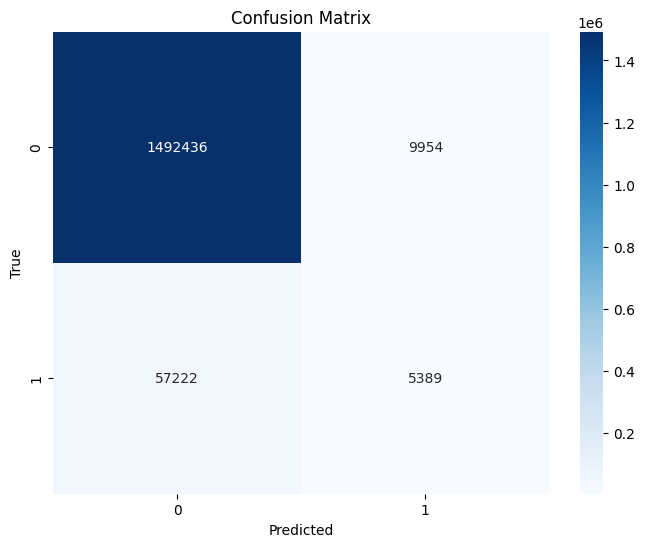

Accuracy: 95.71%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example data arrays
a = df['category']
b = df['category']

# Create boolean array indicating where elements match
matches = (a[:, np.newaxis] == b[np.newaxis, :])

# Create matrix with 1 where matches, 0 elsewhere
result = np.where(matches, 1, 0)

# Compute similarities
similarity_matrix = cosine_similarity(X_lsa)
percent = (similarity_matrix + 1) / 2 * 100

# Apply threshold for similarity
threshold = 70
predicted = np.where(percent > threshold, 1, 0)

# Calculate accuracy
accuracy = np.mean(predicted == result)

# Compute confusion matrix
cm = confusion_matrix(result.ravel(), predicted.ravel())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Example data arrays
a = df['category']
b = df['category']

# Create boolean array indicating where elements match
matches = (a[:, np.newaxis] == b[np.newaxis, :])

# Create matrix with 1 where matches, 0 elsewhere
result = np.where(matches, 1, 0)

# Compute similarities
similarity_matrix = cosine_similarity(X_lsa)
percent = (similarity_matrix + 1) / 2 * 100

# Apply threshold for similarity
threshold = 70
predicted = np.where(percent > threshold, 1, 0)

# Calculate metrics
accuracy = accuracy_score(result.ravel(), predicted.ravel())
precision = precision_score(result.ravel(), predicted.ravel())
recall = recall_score(result.ravel(), predicted.ravel())
f1 = f1_score(result.ravel(), predicted.ravel())
report = classification_report(result.ravel(), predicted.ravel())

# Print metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))
print("Classification Report:")
print(report)


<ipython-input-20-6545a007bfde>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  matches = (a[:, np.newaxis] == b[np.newaxis, :])


Accuracy: 95.71%
Precision: 0.35
Recall: 0.09
F1-score: 0.14
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98   1502390
           1       0.35      0.09      0.14     62611

    accuracy                           0.96   1565001
   macro avg       0.66      0.54      0.56   1565001
weighted avg       0.94      0.96      0.94   1565001

